In [31]:
import numpy as np
import pandas as pd
import statistics  as sts

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import plot_confusion_matrix, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [32]:
df = pd.read_csv('./credit_data.csv')
df.shape

(2000, 5)

In [33]:
df.head(10)

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
5,6,24904.06414,57.471607,15.498598,0
6,7,48430.35961,26.809132,5722.581981,0
7,8,24500.14198,32.897548,2971.003310,1
8,9,40654.89254,55.496853,4755.825280,0
9,10,25075.87277,39.776378,1409.230371,0


# **Data preparation**

In [34]:
df[df.duplicated()]

,clientid,income,age,loan,default


In [35]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [36]:
mediana = sts.median(df['age'])
mediana

18.44842426

In [37]:
df['age'].fillna(mediana, inplace=True)

In [38]:
df.loc[(df['age'] < 0), 'age'] = mediana

# **Data Visualization**

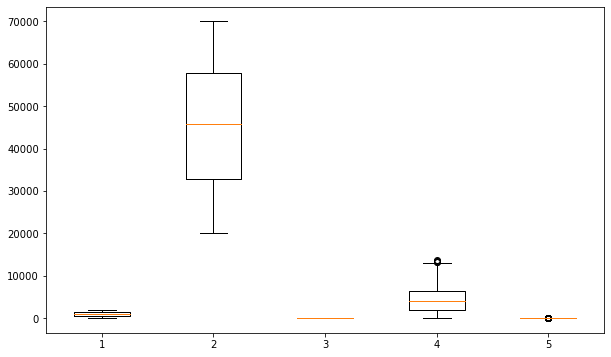

In [39]:
plt.figure(figsize=(10,6))
plt.boxplot(df)
plt.show()

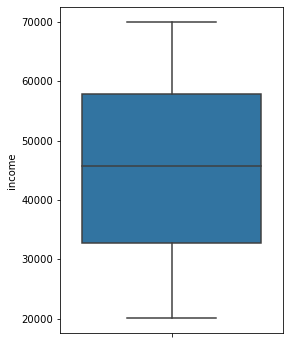

In [40]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['income'])
plt.show()

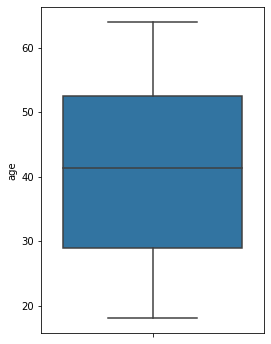

In [41]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['age'])
plt.show()

In [42]:
fig = px.scatter(x=df['income'], y=df['age'], width=500, height=260)
fig.update_layout(
    margin=dict(l=10, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

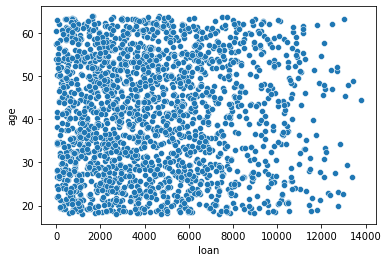

In [43]:
sns.scatterplot(x=df['loan'], y=df['age'])
plt.show()

In [44]:
fig = px.histogram(df, x='age')
fig.show()

In [45]:
fig = px.histogram(df, x='loan')
fig.show()

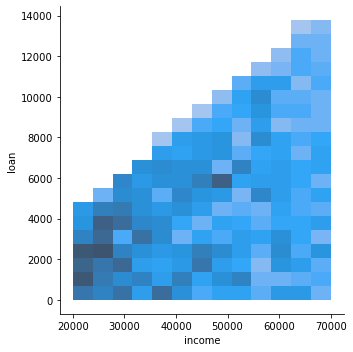

In [46]:
sns.displot(df, x='income', y='loan')
plt.show()

In [47]:
fig = px.scatter(df, x="loan", y="income",color="age", log_x=True, size_max=60)
fig.show()

In [48]:
fig = px.line(df.sort_values(by=['age']), x="age", y="loan")
fig.show()

# **Data processing**

In [49]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x,y

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365795e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [50]:
# spliting data to test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

In [51]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1600, 3) (1600,)
(400, 3) (400,)


## **Logistic Regression**

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

Accuracy: 94.5 %


## **---**

In [54]:
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(9,), learning_rate_init=0.9, activation='logistic', max_iter=1500, random_state=1)
clf.fit(x_train, y_train)

y_pred = clf.predict_proba(x_test)
y_aux = np.argmax(y_pred, 1)

print(f'{accuracy_score(y_test, y_aux)*100} %')

99.0 %


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



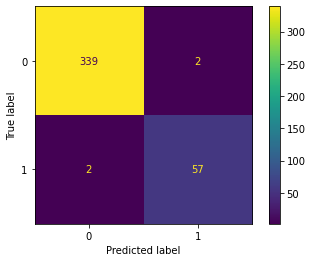

In [55]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [56]:
print(y_test[:10], y_aux[:10])

[0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]


## **Support Vector Machine**

In [57]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)

SVC_predicted = SVC_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, SVC_predicted)*100, "%")

Accuracy: 97.5 %


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



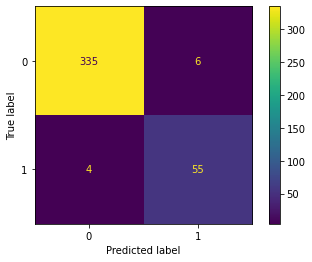

In [58]:
plot_confusion_matrix(SVC_model, x_test, y_test)
plt.show()

## **Random Forest Regressor**

In [59]:
RFR_model = RandomForestRegressor(n_estimators= 100, random_state= 0)
RFR_model.fit(x_train, y_train)
RFR_predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, RFR_predicted)*100, "%")

Accuracy: 94.5 %


In [60]:
print(confusion_matrix(y_test, RFR_predicted))

[[331  10]
 [ 12  47]]


## **Random Forest Classifier**

In [61]:
RFC_model = RandomForestClassifier(n_estimators = 100)
RFC_model.fit(x_train, y_train)

RFC_predicted = RFC_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, RFC_predicted)*100, "%")

Accuracy: 97.0 %


In [62]:
print(confusion_matrix(y_test, RFC_predicted))

[[337   4]
 [  8  51]]
